In [33]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

### Extract CSVs into DataFrames

In [34]:
pokemon_file = "../Resources/pokemon.csv"
pokemon_df = pd.read_csv(pokemon_file)
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [35]:
types_file = "../Resources/types.csv"
types_df = pd.read_csv(types_file)
types_df.head()

,id,identifier,generation_id,damage_class_id
0,1,normal,1,2.0
1,2,fighting,1,2.0
2,3,flying,1,2.0
3,4,poison,1,2.0
4,5,ground,1,2.0


In [36]:
moves_file = "../Resources/moves.csv"
moves_df = pd.read_csv(moves_file)
moves_df.head()


,id,identifier,generation_id,type_id,power,pp,accuracy,priority,target_id,damage_class_id,effect_id,effect_chance,contest_type_id,contest_effect_id,super_contest_effect_id
0,1,pound,1,1,40.0,35.0,100.0,0,10,2,1,NaN,5.0,1.0,5.0
1,2,karate-chop,1,2,50.0,25.0,100.0,0,10,2,44,NaN,5.0,2.0,5.0
2,3,double-slap,1,1,15.0,10.0,85.0,0,10,2,30,NaN,5.0,10.0,7.0
3,4,comet-punch,1,1,18.0,15.0,85.0,0,10,2,30,NaN,5.0,12.0,7.0
4,5,mega-punch,1,1,80.0,20.0,85.0,0,10,2,1,NaN,5.0,1.0,18.0


### Transform Pokemon DataFrame

In [144]:
# Create a filtered dataframe from specific columns for Pokemon
pokemon_cols = ["Name","Type 1","Attack","Defense","Speed"]
pokemon_transformed = pokemon_df[pokemon_cols].copy()

# Rename the Column Headers
pokemon_transformed = pokemon_transformed.rename(columns={"Name": "Pokemon_Name","Type 1": "Types"})

# Set index
# Add new  index for pokemon evolutions and remane PID 
pokemon_transformed.set_index("Pokemon_Name", inplace=True)

pokemon_transformed




,Types,Attack,Defense,Speed
Pokemon_Name,,,,
Bulbasaur,Grass,49,49,45
Ivysaur,Grass,62,63,60
Venusaur,Grass,82,83,80
VenusaurMega Venusaur,Grass,100,123,80
Charmander,Fire,52,43,65
Charmeleon,Fire,64,58,80
Charizard,Fire,84,78,100
CharizardMega Charizard X,Fire,130,111,100
CharizardMega Charizard Y,Fire,104,78,100


### Transform Pokemon Types DataFrame

In [50]:
# Create a filtered dataframe from specific columns for Pokemon
types_cols = ["id","identifier"]
types_transformed = types_df[types_cols].copy()

# Rename the Column Headers
types_transformed = types_transformed.rename(columns={"id": "TID","identifier": "Type"})

# Set index
types_transformed.set_index("TID", inplace=True)

#Capitalized Type Column 
types_transformed['Type']=types_transformed['Type'].str.capitalize()
types_transformed.head()

,Type
TID,
1,Normal
2,Fighting
3,Flying
4,Poison
5,Ground


### Transform Pokemon Moves DataFrame

In [51]:
# Create a filtered dataframe from specific columns for Pokemon
moves_cols = ["id","identifier","type_id"]
moves_transformed = moves_df[moves_cols].copy()

# Rename the Column Headers
moves_transformed = moves_transformed.rename(columns={"id": "MID","identifier": "Moves","type_id": "TID"})

# Set index
moves_transformed.set_index("MID", inplace=True)

moves_transformed.head()

,Moves,TID
MID,,
1,pound,1
2,karate-chop,2
3,double-slap,1
4,comet-punch,1
5,mega-punch,1


In [52]:
# Pokemon average

### Create database connection

In [53]:
connection_string = "postgres:postgres@localhost:5432/Pokemon"
engine = create_engine(f'postgresql://{connection_string}')

In [54]:
# Confirm tables
engine.table_names()

['Types', 'Pokemon', 'Moves']

### Load DataFrames into database

In [64]:
pokemon_transformed.to_sql(name='Pokemon', con=engine, if_exists='append', index=True)

In [62]:
moves_transformed.to_sql(name='Moves', con=engine, if_exists='append', index=True)

In [60]:
types_transformed.to_sql(name='Types', con=engine, if_exists='append', index=True)

In [149]:
poke_attacks=pokemon_transformed
poke_attacks.sort_values(by='Attack', ascending=False)

poke_defense=pokemon_transformed
poke_defense.sort_values(by='Defense', ascending=False)

poke_speed=pokemon_transformed
poke_speed.sort_values(["Speed"], axis=0, 
                 ascending=False, inplace=True)


poke_attacks

,Types,Attack,Defense,Speed
Pokemon_Name,,,,
DeoxysSpeed Forme,Psychic,95,90,180
Ninjask,Bug,90,45,160
AlakazamMega Alakazam,Psychic,50,65,150
AerodactylMega Aerodactyl,Rock,135,85,150
DeoxysNormal Forme,Psychic,150,50,150
DeoxysAttack Forme,Psychic,180,20,150
Accelgor,Bug,70,40,145
SceptileMega Sceptile,Grass,110,75,145
BeedrillMega Beedrill,Bug,150,40,145


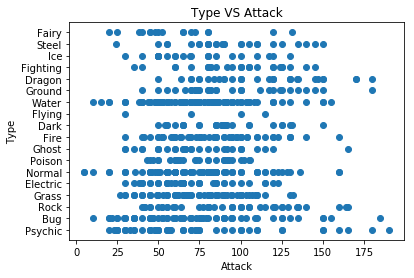

In [158]:
plt.scatter(pokemon_transformed['Attack'], pokemon_transformed['Types'])
plt.title('Type VS Attack')
plt.xlabel('Attack')
plt.ylabel('Type')
plt.savefig('../Images/Type_VS_Attack_Scatter.png')

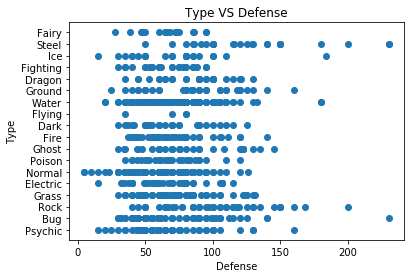

In [150]:
plt.scatter(pokemon_transformed['Defense'], pokemon_transformed['Types'])
plt.title('Type VS Defense')
plt.xlabel('Defense')
plt.ylabel('Type')
plt.savefig('../Images/Type_VS_Defense_Scatter.png')

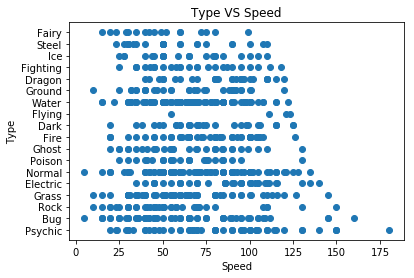

In [157]:
plt.scatter(pokemon_transformed['Speed'], pokemon_transformed['Types'])
plt.title('Type VS Speed')
plt.xlabel('Speed')
plt.ylabel('Type')
plt.savefig('../Images/Type_VS_Speed_Scatter.png')

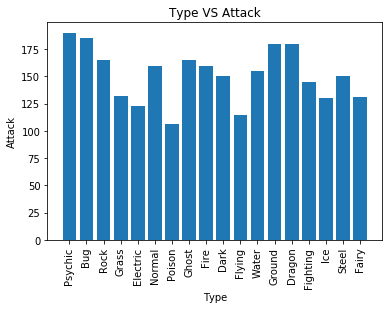

In [155]:
plt.bar(pokemon_transformed['Types'], pokemon_transformed['Attack'])
plt.title('Type VS Attack')
plt.xlabel('Type')
plt.ylabel('Attack')
plt.xticks(rotation='vertical')
plt.savefig('../Images/Type_VS_Attack_Bar.png')

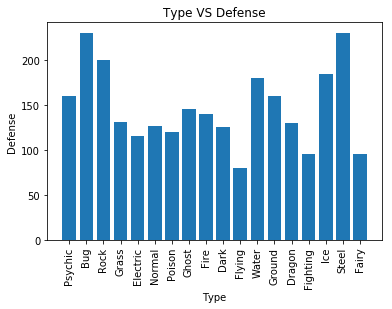

In [154]:
plt.bar(pokemon_transformed['Types'], pokemon_transformed['Defense'])
plt.title('Type VS Defense')
plt.xlabel('Type')
plt.ylabel('Defense')
plt.xticks(rotation='vertical')
plt.savefig('../Images/Type_VS_Defense_Bar.png')

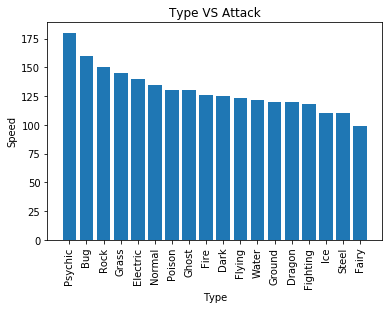

In [153]:
plt.bar(pokemon_transformed['Types'], pokemon_transformed['Speed'])
plt.title('Type VS Attack')
plt.xlabel('Type')
plt.ylabel('Speed')
plt.xticks(rotation='vertical')
plt.savefig('../Images/Type_VS_Speed_Bar.png')